# Exploratory Data Analysis on Car Data set


## Objectives

Goals for this project  :

*   Brief description of the data set and a summary of its attributes
*   Initial plan for data exploration
*   Actions taken for data cleaning and feature engineering
*   Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
*   Formulating at least 3 hypothesis about this data
*   Conducting a formal significance test for one of the hypotheses and discuss the results 
*   Suggestions for next steps in analyzing this data
*   A paragraph that summarizes the quality of this data set and a request for additional data if needed

## **Brief Desription about the data**

We found this data from kaggle, it is a dataset containing information about cars (Used plus new). The idea behind the data set is to be able to predict the car selling price.

Following are the features in the data set and a few description about the data

*  name : categorial feature; Name of the cars ex. Maruti Suzuki, Hyundai Verna etc.
*  year : categorical feature; Year when the car was last bought
*  selling_price : continuous feature; Price at which the car is offered to be sold, this is the predictor variable
*  km_driven : continuous feature; Number of kilometers the car has been driven
*  fuel : categorical feature; Fuel type of the car ex. Petrol, diesel, cng, lpg, electric
*  seller_type : categorical feature; Describes if the seller is an individual or a dealership
*  transmission : categorical feature; Gear trasmission of the car automatic or Manual
*  Owner  : categorical feature; tells if the owner is the first owner or second etc.
*  mileage  : mileage of the car
*  engine  : Engine of the car
*  max power : Max power
*  torque  : 
*  seats  : 4,5 etc

let's load our packeges and start exploring the data

## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for statistical computations.

In [738]:
# !pip install piplite

In [739]:
# import piplite
# await pip.install(['pandas', 'numpy', 'seaborn', 'matplotlib', 'scikit-learn', 'scipy', 'skillsnetwork'])

In [740]:
import warnings 
warnings.filterwarnings('ignore')

In [741]:
# import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import plotly.express as px

In [742]:
cars = pd.read_csv('Car details v3.csv', sep=',')

cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [743]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
name             8128 non-null object
year             8128 non-null int64
selling_price    8128 non-null int64
km_driven        8128 non-null int64
fuel             8128 non-null object
seller_type      8128 non-null object
transmission     8128 non-null object
owner            8128 non-null object
mileage          7907 non-null object
engine           7907 non-null object
max_power        7913 non-null object
torque           7906 non-null object
seats            7907 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


there are around 8,128 rows in the data, some of the columns have null values mainly mileage, engine, max power, torque, seats

In [744]:
cars["selling_price"].describe()

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

The mean of the selling price is around 63,82,718 in Rupees min is around 2.9 lakhs and STD is 8.06

let's see what all years are these cars from

In [745]:
cars.year.value_counts()

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
1998      10
2001      10
1994       3
1996       3
1995       2
1983       1
1991       1
Name: year, dtype: int64

we are looking at cars from 1980's to 2019

let's look at correlation between the variables

# EDA part 1

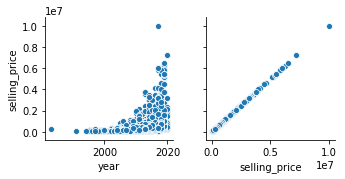

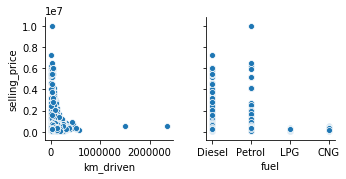

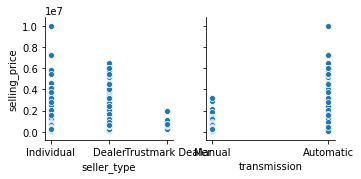

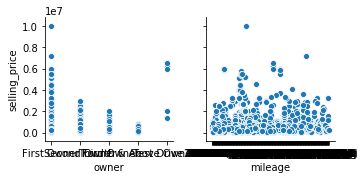

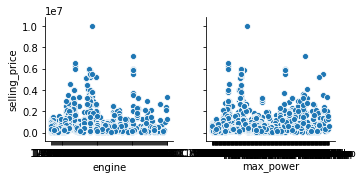

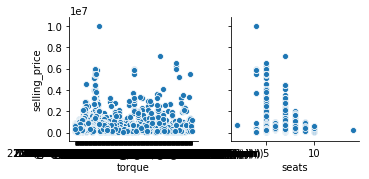

In [746]:
for i in range(1, len(cars.columns), 2):
    sns.pairplot(data=cars,
                x_vars=cars.columns[i:i+2],
                y_vars=['selling_price'])

at this point only two relationships that can be observed clearly are that selling price is higher for newer cars and cars that are less driven

let's look at how the distribution for selling price is looking like

# Feature Engineering

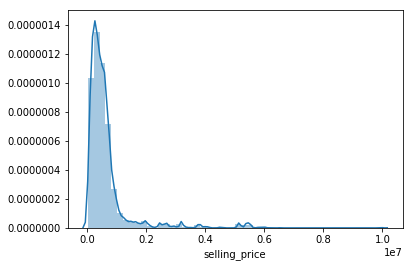

In [747]:
sp_untransformed = sns.distplot(cars['selling_price'])

it is a highly positively skewed normal distribution, lets check for its skewness

In [748]:
print("Skewness: %f" % cars['selling_price'].skew())

Skewness: 4.193533


let's check if log tranform does any trick for us

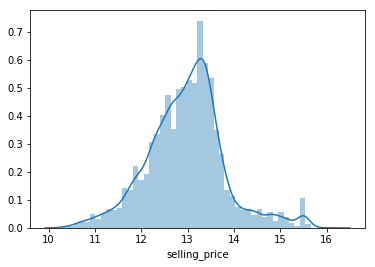

In [749]:
log_transformed = np.log(cars['selling_price'])
sp_transformed = sns.distplot(log_transformed)

In [750]:
print("Skewness: %f" % log_transformed.skew())

Skewness: 0.223259


log transforming selling price has made it much better, usually a fairly symetric bell curve distribution is between -0.5 to 0.5 and log transforming
selling price has given us a skewness of 0.22

storing the log transformed values into a variable in the dataframe

In [751]:
cars1 = cars.copy()

In [752]:
cars['log_trans_sel_pc'] = np.log(cars['selling_price'])

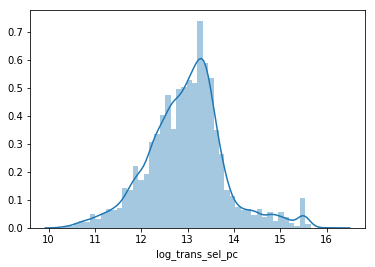

In [753]:
sp_lgtransformed = sns.distplot(cars['log_trans_sel_pc'])

Let's looks at some of the other features like seats, km driven

Skewness: 11.170910


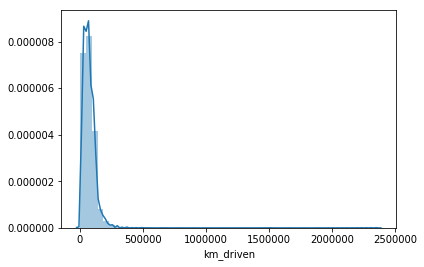

In [754]:
km_untransformed = sns.distplot(cars['km_driven'])
print("Skewness: %f" % cars['km_driven'].skew()) ## higly positively skewed

Skewness: -1.285045


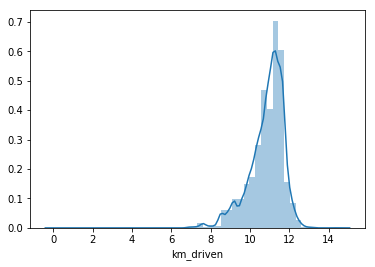

In [755]:
log_transformed_km = np.log(cars['km_driven'])
km_transformed = sns.distplot(log_transformed_km)
print("Skewness: %f" % log_transformed_km.skew()) ## log transformation reduced the skewness

log transforming it is making it negatively skewed

lets check with sqrt and boxcox transformation

Skewness: 0.662873


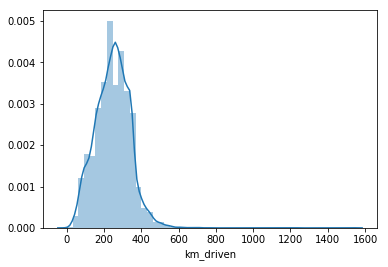

In [756]:
sqrt_transformed_km = np.sqrt(cars['km_driven'])
km_transformedsqrt = sns.distplot(sqrt_transformed_km)
print("Skewness: %f" % sqrt_transformed_km.skew())

sqrt does a better job than log

Skewness: 0.068519


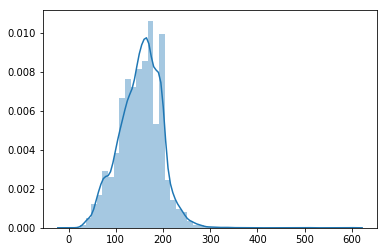

In [757]:
bxcx_transformed_km = stats.boxcox(cars['km_driven'])[0]
km_transformed_bxcx = sns.distplot(bxcx_transformed_km)
print("Skewness: %f" % pd.Series(bxcx_transformed_km).skew()) ## log transformation reduced the skewness
cars['bxcx_trans_km_driven'] = stats.boxcox(cars['km_driven'])[0]

box cox does the best job, now lets look at seats

Skewness: 1.969914


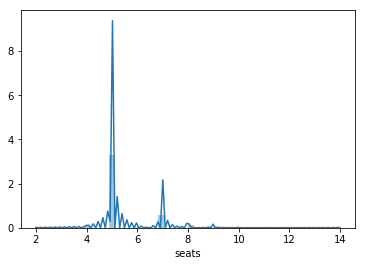

In [758]:
st_untransformed = sns.distplot(cars['seats'])
print("Skewness: %f" % cars['seats'].skew()) ## higly positively skewed

Skewness: 1.586030


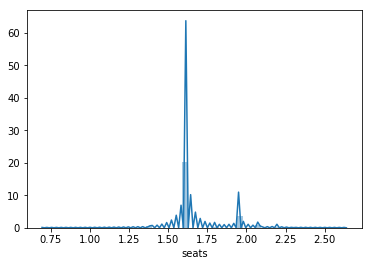

In [759]:
log_transformed_st = np.log(cars['seats'])
st_transformed = sns.distplot(log_transformed_st)
print("Skewness: %f" % log_transformed_st.skew()) ## log transformation reduced the skewness

still pretty high

Skewness: 1.779886


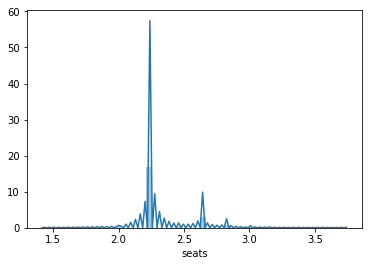

In [760]:
sqrt_transformed_st = np.sqrt(cars['seats'])
st_transformedsqrt = sns.distplot(sqrt_transformed_st)
print("Skewness: %f" % sqrt_transformed_st.skew()) ## log transformation reduced the skewness

worse than log

Skewness: 74.868022


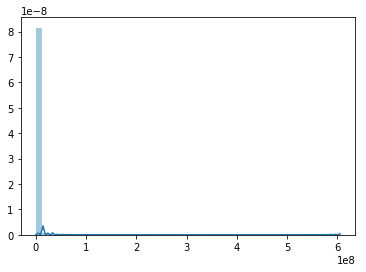

In [761]:
bxcx_transformed_st = stats.boxcox(cars['seats'])[0]
st_transformed_bxcx = sns.distplot(bxcx_transformed_st)
print("Skewness: %f" % pd.Series(bxcx_transformed_st).skew()) ## log transformation reduced the skewness

none of the transformations are working for seats

## **Handling the Missing Values**


Text(0.5, 1.0, 'Total Missing Values')

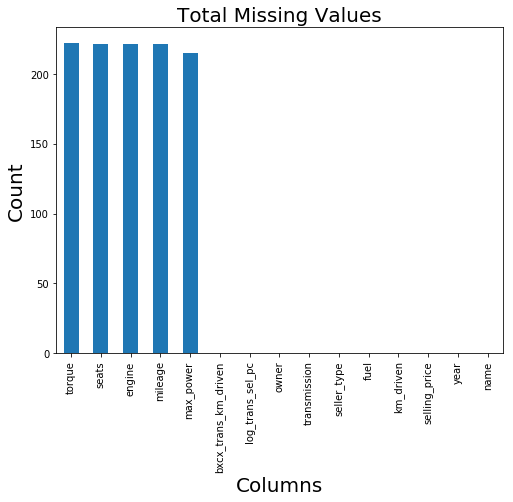

In [762]:
total = cars.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

as we had already seen some missing values are in torque, seats, mileage, max_power

In [763]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
name                    8128 non-null object
year                    8128 non-null int64
selling_price           8128 non-null int64
km_driven               8128 non-null int64
fuel                    8128 non-null object
seller_type             8128 non-null object
transmission            8128 non-null object
owner                   8128 non-null object
mileage                 7907 non-null object
engine                  7907 non-null object
max_power               7913 non-null object
torque                  7906 non-null object
seats                   7907 non-null float64
log_trans_sel_pc        8128 non-null float64
bxcx_trans_km_driven    8128 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 952.6+ KB


since the number of missing values are pretty low, we can drop them

In [764]:
def null_percentage(df):
    # get the total number of rows in the dataframe
    total_rows = len(df)

    # calculate the percentage of null values in each column
    null_percentages = df.isnull().sum() / total_rows * 100

    return null_percentages
null_percent = null_percentage(cars)

print(null_percent)

name                    0.000000
year                    0.000000
selling_price           0.000000
km_driven               0.000000
fuel                    0.000000
seller_type             0.000000
transmission            0.000000
owner                   0.000000
mileage                 2.718996
engine                  2.718996
max_power               2.645177
torque                  2.731299
seats                   2.718996
log_trans_sel_pc        0.000000
bxcx_trans_km_driven    0.000000
dtype: float64


as we can see most of the columns have less than 3 percent null so we cna drop them

In [765]:
cars.shape

(8128, 15)

In [766]:
cars2 = cars.copy()


In [1018]:
# cars = cars2

In [1019]:
cars2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_trans_sel_pc,bxcx_trans_km_driven
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,13.017003,213.044798
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,12.821258,198.276445
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,11.970350,210.007021
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12.323856,202.513693
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.775290,198.276445


In [1020]:
cars = cars.dropna()

In [1021]:
cars.shape

(7906, 15)

lets look at some more categorical variables

In [1022]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven'], dtype=object)

In [1023]:
# cars = cars2
# cars = cars.dropna()

In [1024]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_trans_sel_pc,bxcx_trans_km_driven
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,13.017003,213.044798
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,12.821258,198.276445
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,11.970350,210.007021
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12.323856,202.513693
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.775290,198.276445


## Year

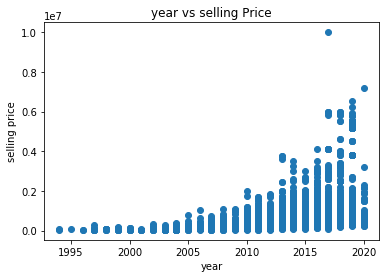

In [1025]:
ax = plt.axes()

ax.scatter(cars.year, cars.selling_price)

# Label the axes
ax.set(xlabel='year',
       ylabel='selling price',
       title='year vs selling Price');
### END SOLUTION

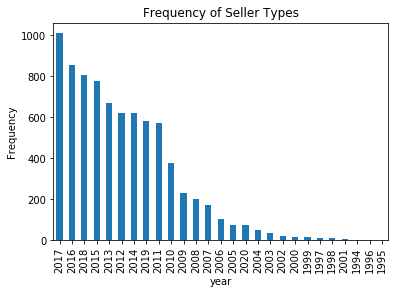

In [1027]:
# Create a frequency table of the "seller_Type" column
seller_freq = cars['year'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Seller Types')
plt.xlabel('year')
plt.ylabel('Frequency')

# Display the plot
plt.show()

most of the data is between 2015 and 2020, similarly prices are higher for the cars in the last 5 years
lets split years into two categories last 5 years, 5 years or older

In [1029]:
# convert years column to datetime
cars['year'] = pd.to_datetime(cars['year'], format='%Y')

# get maximum year in data
current_year = max(cars['year']).year

# create mask for last 5 years
last_5_years_mask = (cars['year'] > pd.to_datetime(f'{current_year - 5}', format='%Y'))

# create new column with categories
cars['Year Category'] = pd.np.where(last_5_years_mask, 'Last 5 Years', '5 Years or Older')

# display data
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_trans_sel_pc,bxcx_trans_km_driven,Year Category
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,13.017003,213.044798,5 Years or Older
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,12.821258,198.276445,5 Years or Older
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,11.970350,210.007021,5 Years or Older
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12.323856,202.513693,5 Years or Older
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.775290,198.276445,5 Years or Older


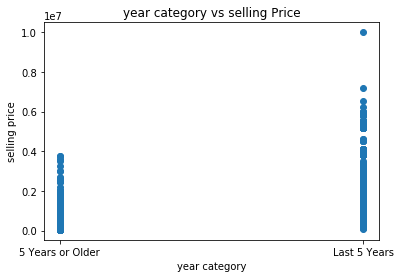

In [1030]:
ax = plt.axes()

ax.scatter(cars['Year Category'], cars.selling_price)

# Label the axes
ax.set(xlabel='year category',
       ylabel='selling price',
       title='year category vs selling Price');
### END SOLUTION

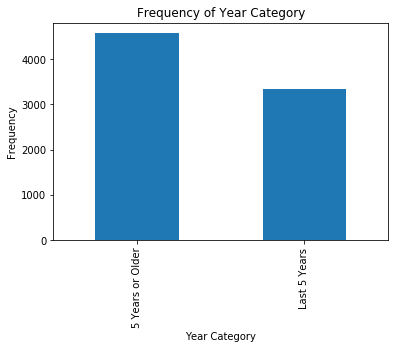

In [1031]:
# Create a frequency table of the "seller_Type" column
seller_freq = cars['Year Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [777]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category'], dtype=object)

lets also look at the mean selling price per fuel type

## Fuel Type

In [1032]:
# group by fuel type and calculate mean selling price
mean_sell_price = cars.groupby('fuel')['selling_price'].mean()

# display results
print(mean_sell_price)

fuel
CNG       317903.788462
Diesel    802450.282624
LPG       210885.714286
Petrol    472665.203125
Name: selling_price, dtype: float64


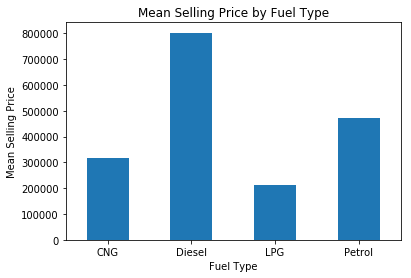

In [1033]:
# create histogram plot
mean_sell_price.plot(kind='bar', rot=0)
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Fuel Type')

# display plot
plt.show()

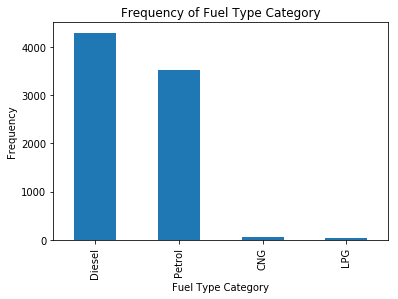

In [1035]:
# Create a frequency table of the "seller_Type" column
seller_freq = cars['fuel'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Fuel Type Category')
plt.xlabel('Fuel Type Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [1036]:
# Create a copy of the original column
cars['fuel_new'] = cars['fuel'].copy()

# Replace Diesel and Petrol with 'oil'
cars['fuel_new'] = cars['fuel_new'].replace(['Diesel', 'Petrol'], 'oil')

# Replace CNG and LPG with 'gas'
cars['fuel_new'] = cars['fuel_new'].replace(['CNG', 'LPG'], 'gas')


fuel_new
gas    274850.540230
oil    653985.839621
Name: selling_price, dtype: float64


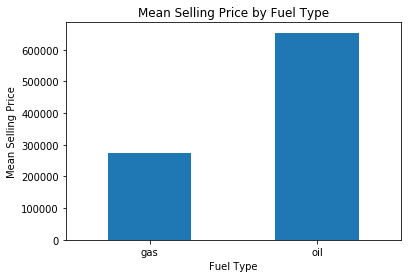

In [1037]:
# group by fuel type and calculate mean selling price
mean_sell_price = cars.groupby('fuel_new')['selling_price'].mean()

# display results
print(mean_sell_price)

# create histogram plot
mean_sell_price.plot(kind='bar', rot=0)
plt.xlabel('Fuel Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Fuel Type')

# display plot
plt.show()

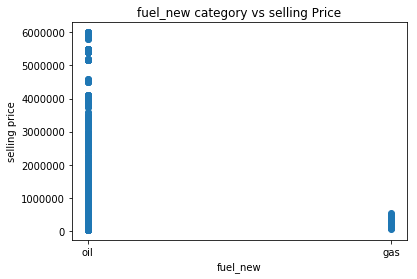

In [1013]:
ax = plt.axes()

ax.scatter(cars['fuel_new'], cars.selling_price)

# Label the axes
ax.set(xlabel='fuel_new',
       ylabel='selling price',
       title='fuel_new category vs selling Price');
### END SOLUTION

Diesel cars are the most costly, followed by petrol

## lets look at seller type as well

seller_type
Dealer              1.459910e+06
Individual          5.077058e+05
Trustmark Dealer    8.018390e+05
Name: selling_price, dtype: float64


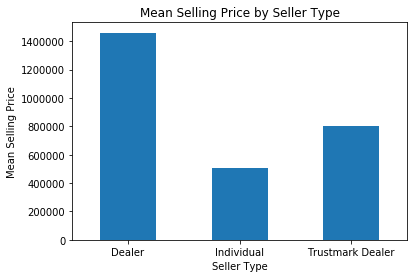

In [780]:
# group by fuel type and calculate mean selling price
mean_sell_type = cars.groupby('seller_type')['selling_price'].mean()

# display results
print(mean_sell_type)


# create histogram plot
mean_sell_type.plot(kind='bar', rot=0)
plt.xlabel('Seller Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Seller Type')

# display plot
plt.show()

Most sales occur from Dealership followerd by Trustmark Dealer and individaul seller type, here trustmark dealer is also another type of dealer that has some sort of certification, for our problem we can club dealer and trustmark dealer

Also renaming Individual seller type as Individual

In [1040]:
price_byseller = cars.groupby(['km_driven', 'seller_type'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

fig = px.line(price_byseller
                   ,x='km_driven', y = "selling_price", 
                   color = "seller_type", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car price by seller type",
    xaxis_title="km_driven",
    yaxis_title="Annual Average Price")
fig.show()


In [1130]:
# replace "Trustmark Dealer" with "Dealer"
cars['seller_type'] = cars['seller_type'].replace('Trustmark Dealer', 'Dealer')
cars['seller_type'] = cars['seller_type'].replace('Individual Seller Type', 'Individual')

seller_type
Dealer        1.337077e+06
Individual    5.053075e+05
Name: selling_price, dtype: float64


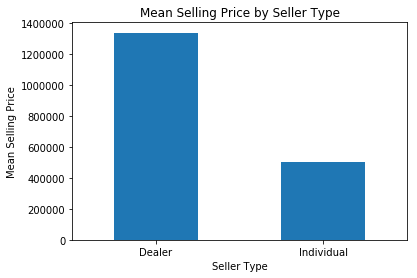

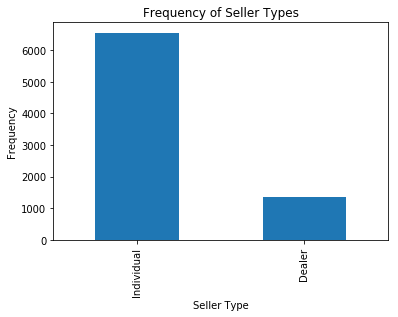

In [1131]:
# group by fuel type and calculate mean selling price
mean_sell_type = cars.groupby('seller_type')['selling_price'].mean()

# display results
print(mean_sell_type)


# create histogram plot
mean_sell_type.plot(kind='bar', rot=0)
plt.xlabel('Seller Type')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Seller Type')

# display plot
plt.show()


# Create a frequency table of the "seller_Type" column
seller_freq = cars['seller_type'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

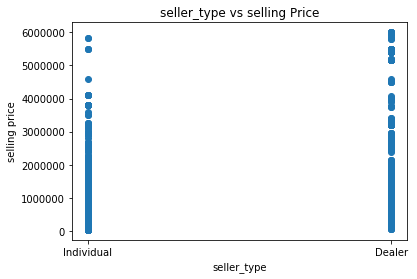

In [1132]:
ax = plt.axes()

ax.scatter(cars.seller_type, cars.selling_price)

# Label the axes
ax.set(xlabel='seller_type',
       ylabel='selling price',
       title='seller_type vs selling Price');
### END SOLUTION

In [1133]:
# plt.hist(cars['seller_type'], bins=50)
# plt.title(f'{"seller_type"} distribution')
# plt.xlabel('seller_type')
# plt.ylabel('Frequency')
# plt.show()

## Transmission

transmission
Automatic    1.882972e+06
Manual       4.628191e+05
Name: selling_price, dtype: float64


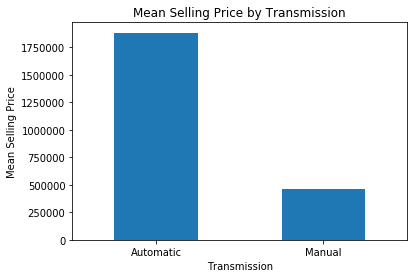

In [785]:
# group by fuel type and calculate mean selling price
mean_sell_transmission = cars.groupby('transmission')['selling_price'].mean()

# display results
print(mean_sell_transmission)


# create histogram plot
mean_sell_transmission.plot(kind='bar', rot=0)
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by Transmission')

# display plot
plt.show()

Automatic has more price than Manual as expected

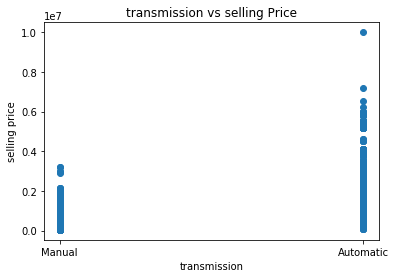

In [786]:
ax = plt.axes()

ax.scatter(cars.transmission, cars.selling_price)

# Label the axes
ax.set(xlabel='transmission',
       ylabel='selling price',
       title='transmission vs selling Price');
### END SOLUTION

In [787]:
# plt.hist(cars['transmission'], bins=10)
# plt.title(f'{"transmission"} distribution')
# plt.xlabel('transmission')
# plt.ylabel('Frequency')
# plt.show()

In [788]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category'], dtype=object)

## Owner

owner
First Owner             7.899799e+05
Fourth & Above Owner    2.331968e+05
Second Owner            4.012035e+05
Test Drive Car          4.403800e+06
Third Owner             2.931873e+05
Name: selling_price, dtype: float64


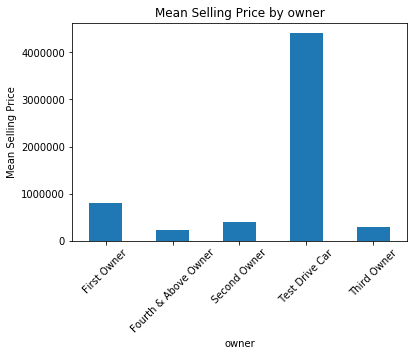

In [789]:
# group by fuel type and calculate mean selling price
mean_sell_owner = cars.groupby('owner')['selling_price'].mean()

# display results
print(mean_sell_owner)


# create histogram plot
mean_sell_owner.plot(kind='bar', rot=0)
plt.xlabel('owner')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by owner')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

it seems test drive cars has the most price over other owned cars

In [1041]:
# Create a copy of the original column
cars['owner_new'] = cars['owner'].copy()

# Replace Second, third and Fourth and above owner by more than 1 owner'
cars['owner_new'] = cars['owner_new'].replace(['Second Owner', 'Third Owner', 'Fourth & Above Owner'], 'More than one owner')


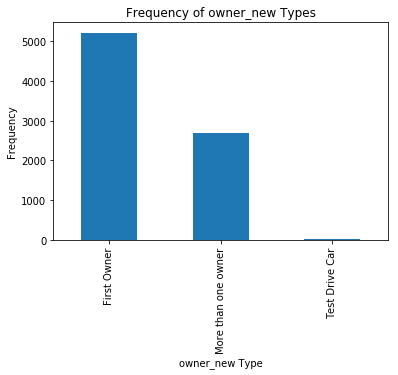

In [1042]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['owner_new'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of owner_new Types')
plt.xlabel('owner_new Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Seats

seats
2.0     700500.000000
4.0     486764.661654
5.0     630044.551807
6.0     581596.774194
7.0     812923.184821
8.0     585855.280851
9.0     500074.937500
10.0    344105.105263
14.0    235000.000000
Name: selling_price, dtype: float64


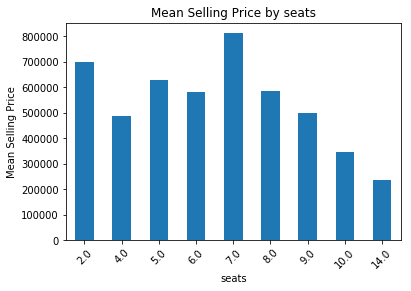

In [1043]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('seats')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0)
plt.xlabel('seats')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by seats')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

## creating seat categories

In [1044]:

categories = ['lt_5', '5_to_8','gt_8']

# define the bins for engine displacement categories
bins = [0, 5, 8, float('inf')]


# bucketize engine displacement into categories
cars['seats_Category'] = pd.cut(cars['seats'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['seats_Category'].value_counts())

lt_5      6389
5_to_8    1417
gt_8       100
Name: seats_Category, dtype: int64


Seems like there are some above 8 seater cars as well lets check their counts to determine if they are outliers

In [1045]:
cars.seats.value_counts()

5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

Not sure about the above 8 seater cars right now but there is only 1 14 seater car which surely looks like an outlier

lets look at the car names for above 8 seater cars

In [1046]:
# filter data to include only cars with 8 or more seats
eight_seats_or_more = cars[cars['seats'] >= 8]

# display car names for filtered data
print(eight_seats_or_more['name'].unique())

['Maruti Omni E MPI STD BS IV' 'Toyota Innova 2.5 VX (Diesel) 8 Seater'
 'Mahindra Scorpio VLX AT AIRBAG BSIV' 'Mahindra Marazzo M6 8Str'
 'Mahindra Scorpio LX' 'Toyota Innova 2.5 GX (Diesel) 8 Seater'
 'Toyota Innova 2.5 V Diesel 8-seater'
 'Toyota Innova 2.5 G1 Diesel 8-seater'
 'Mahindra Bolero 2011-2019 DI 4WD NON AC'
 'Toyota Innova 2.5 G (Diesel) 8 Seater'
 'Toyota Innova 2.5 G (Diesel) 8 Seater BS IV' 'Tata Sumo CX 10 Str BSIV'
 'Mahindra Bolero 2011-2019 DI - AC BS III' 'Mahindra Xylo D2 BS IV'
 'Mahindra Bolero 2011-2019 DI BSIII' 'Mahindra Bolero DI DX 8 Seater'
 'Chevrolet Tavera Neo 3 LT 9 Seats BSIII'
 'Mahindra Bolero 2011-2019 Plus AC'
 'Mahindra Bolero 2011-2019 Plus - AC BSIII'
 'Mahindra Bolero 2011-2019 Plus-AC Plus PS BSIII'
 'Mahindra Scorpio VLX 2WD AIRBAG SE BSIV'
 'Toyota Innova 2.5 E Diesel MS 8-seater' 'Mahindra Xylo D2'
 'Mahindra Xylo D4 BSIV' 'Mahindra Scorpio 2.6 SPORTZ CRDe'
 'Chevrolet Tavera Neo 3 LS 10 Str' 'Maruti Omni 8 Seater BSII'
 'Mahindra Scorpi

looks like these are legit cars

In [1047]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category', 'fuel_new', 'owner_new',
       'seats_Category'], dtype=object)

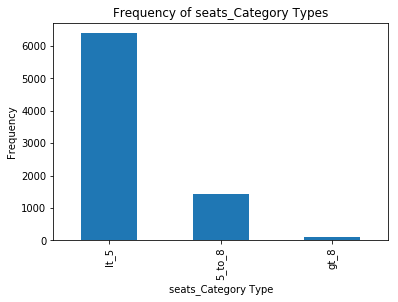

In [1048]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['seats_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of seats_Category Types')
plt.xlabel('seats_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Engine

In [1050]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_trans_sel_pc,bxcx_trans_km_driven,Year Category,fuel_new,owner_new,seats_Category
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,13.017003,213.044798,5 Years or Older,oil,First Owner,lt_5
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,12.821258,198.276445,5 Years or Older,oil,More than one owner,lt_5
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,11.970350,210.007021,5 Years or Older,oil,More than one owner,lt_5
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12.323856,202.513693,5 Years or Older,oil,First Owner,lt_5
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.775290,198.276445,5 Years or Older,oil,First Owner,lt_5


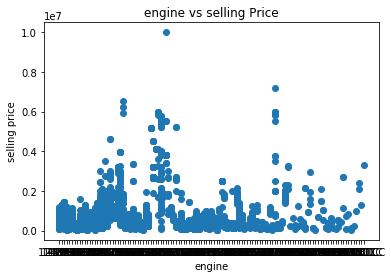

In [1051]:
ax = plt.axes()

ax.scatter(cars.engine, cars.selling_price)

# Label the axes
ax.set(xlabel='engine',
       ylabel='selling price',
       title='engine vs selling Price');
### END SOLUTION

In [1062]:
# # group by fuel type and calculate mean selling price
# mean_sell_engine = cars.groupby('engine')['selling_price'].mean()

# # display results
# print(mean_sell_engine)


# # create histogram plot
# mean_sell_engine.plot(kind='bar', rot=0)
# plt.xlabel('engine')
# plt.ylabel('Mean Selling Price')
# plt.title('Mean Selling Price by engine')

# # tilt x-axis labels by 45 degrees
# plt.xticks(rotation=45)


# # display plot
# plt.show()

# cars.engine.value_counts()

In [1056]:
len(cars.engine.unique())

121

Looks like there are total 121 different categories of engine, we would need to make buckets,

lets make buckets of 500cc, 1000 cc, 1500 cc, 1500 and more 

In [1057]:
cars3 = cars.copy()

In [1058]:
# cars = cars3

In [1059]:

# convert Engine column to integer type
cars['engine_num'] = cars['engine'].str.extract('(\d+)').astype(int)

categories = ['lt_1000', '1000_to_1250', '1250_to_1500', '1500_to_2000', 'gt_2000']

# define the bins for engine displacement categories
bins = [0, 1000, 1250, 1500, 2000, float('inf')]


# bucketize engine displacement into categories
cars['Engine_Category'] = pd.cut(cars['engine_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['Engine_Category'].value_counts())

1000_to_1250    2803
1250_to_1500    1727
lt_1000         1312
gt_2000         1213
1500_to_2000     851
Name: Engine_Category, dtype: int64


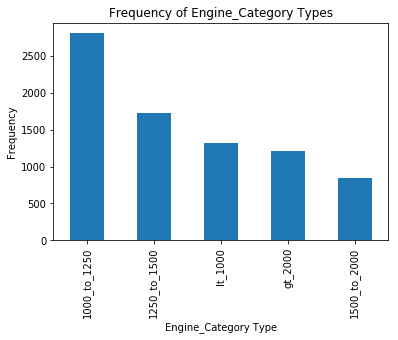

In [1060]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['Engine_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of Engine_Category Types')
plt.xlabel('Engine_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [941]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,log_trans_sel_pc,bxcx_trans_km_driven,Year Category,seats_Category,engine_num,Engine_Category
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,13.017003,213.044798,5 Years or Older,lt_5,1248,1000_to_1250
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,12.821258,198.276445,5 Years or Older,lt_5,1498,1250_to_1500
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,11.970350,210.007021,5 Years or Older,lt_5,1497,1250_to_1500
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12.323856,202.513693,5 Years or Older,lt_5,1396,1250_to_1500
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,11.775290,198.276445,5 Years or Older,lt_5,1298,1250_to_1500


In [942]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category', 'seats_Category',
       'engine_num', 'Engine_Category'], dtype=object)

In [1063]:
# cars.max_power.unique()

# # sort unique values of the 'Name' column
# sorted_names = sorted(cars['max_power'].unique())

# print(sorted_names)

lets look if the engine and max_power after converting to numerical has correlation with selling price

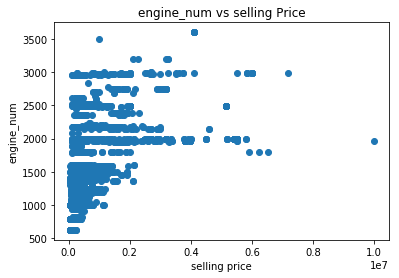

In [1064]:
ax = plt.axes()

ax.scatter(cars.selling_price,cars.engine_num)

# Label the axes
ax.set(xlabel='selling price',
       ylabel='engine_num',
       title='engine_num vs selling Price');
### END SOLUTION

engine nummerical still behaves like categories even after converting to numerical values, so better to use it as categories only

## Max_power

In [1065]:

# convert Engine column to integer type
cars['max_power_num'] = cars['max_power'].str.extract('(\d+)').astype(int)

categories = ['lt_50', '50_to_100', '100_to_150', '150_to_200', 'gt_200']

# define the bins for engine displacement categories
bins = [0, 50, 100, 150, 200, float('inf')]


# bucketize engine displacement into categories
cars['mp_Category'] = pd.cut(cars['max_power_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['mp_Category'].value_counts())

50_to_100     5395
100_to_150    1455
150_to_200     489
lt_50          477
gt_200          90
Name: mp_Category, dtype: int64


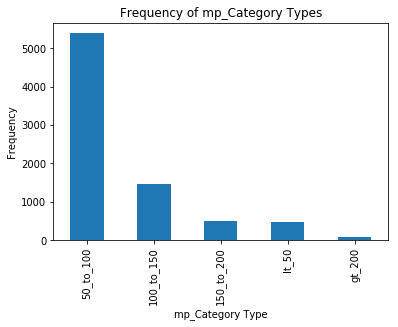

In [1066]:

# Create a frequency table of the "seller_Type" column
seller_freq = cars['mp_Category'].value_counts()

# Create a bar plot of the frequency table
seller_freq.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Frequency of mp_Category Types')
plt.xlabel('mp_Category Type')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## mileage

In [1067]:
# cars.mileage.unique()

In [1142]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 27 columns):
name                    7891 non-null object
year                    7891 non-null datetime64[ns]
selling_price           7891 non-null int64
km_driven               7891 non-null int64
fuel                    7891 non-null object
seller_type             7891 non-null object
transmission            7891 non-null object
owner                   7891 non-null object
mileage                 7891 non-null object
engine                  7891 non-null object
max_power               7891 non-null object
torque                  7891 non-null object
seats                   7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
engine_num              789

In [1143]:

# convert Engine column to integer type
cars['mileage_num'] = cars['mileage'].str.extract('(\d+)').astype(int)

categories = ['lt_15', '15_to_20', '20_to_25', '25_to_30', 'gt_30']

# define the bins for engine displacement categories
bins = [-1, 15, 20, 25, 30, float('inf')]


# bucketize engine displacement into categories
cars['mileage_Category'] = pd.cut(cars['mileage_num'], bins=bins, labels=categories)

# display the new column with engine displacement categories
print(cars['mileage_Category'].value_counts())

15_to_20    3580
20_to_25    2399
lt_15       1537
25_to_30     369
gt_30          6
Name: mileage_Category, dtype: int64


In [1144]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 29 columns):
name                    7891 non-null object
year                    7891 non-null datetime64[ns]
selling_price           7891 non-null int64
km_driven               7891 non-null int64
fuel                    7891 non-null object
seller_type             7891 non-null object
transmission            7891 non-null object
owner                   7891 non-null object
mileage                 7891 non-null object
engine                  7891 non-null object
max_power               7891 non-null object
torque                  7891 non-null object
seats                   7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
engine_num              789

In [1145]:
# select all rows where mileage_Category is null
null_mileage = cars[cars['mileage_Category'].isnull()]

# print the resulting dataframe
display(null_mileage)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,engine_num,Engine_Category,max_power_num,mp_Category,company_name,country,class,Only_year,mileage_num,mileage_Category


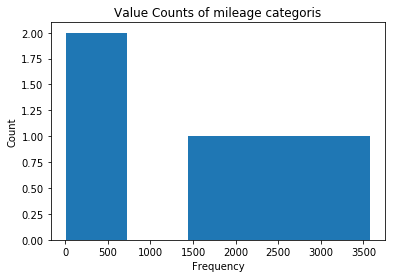

In [1146]:
# create a histogram frequency plot of the 'Name' column
plt.hist(cars['mileage_Category'].value_counts(), bins=len(cars['mileage_Category'].unique()))
plt.title('Value Counts of mileage categoris')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

In [1147]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category', 'fuel_new', 'owner_new',
       'seats_Category', 'engine_num', 'Engine_Category', 'max_power_num',
       'mp_Category', 'company_name', 'country', 'class', 'Only_year',
       'mileage_num', 'mileage_Category'], dtype=object)

In [1148]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,engine_num,Engine_Category,max_power_num,mp_Category,company_name,country,class,Only_year,mileage_num,mileage_Category
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,1248,1000_to_1250,74,50_to_100,Maruti,India,Economy,2014,23,20_to_25
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,1498,1250_to_1500,103,100_to_150,Skoda,Czech Republic,Premium,2014,21,20_to_25
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,1497,1250_to_1500,78,50_to_100,Honda,Japan,Economy,2006,17,15_to_20
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,1396,1250_to_1500,90,50_to_100,Hyundai,South Korea,Economy,2010,23,20_to_25
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,1298,1250_to_1500,88,50_to_100,Maruti,India,Economy,2007,16,15_to_20


# Looking for outliers

univariate analysis

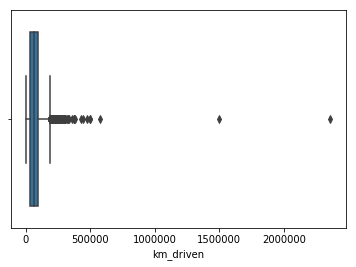

In [1069]:
sns.boxplot(x=cars['km_driven'])

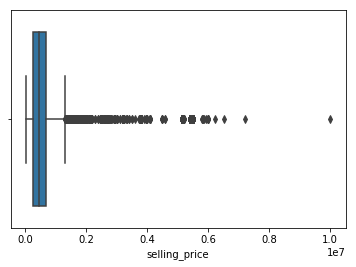

In [1070]:
sns.boxplot(x=cars['selling_price'])

We can see that there are 2 outliers clearly

Bivariate analysis

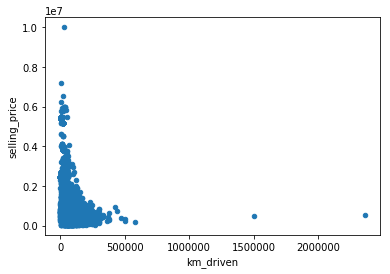

In [1071]:
price_km = cars.plot.scatter(x='km_driven',
                      y='selling_price')

we can easily see there are a few outliers

## deleting km driven outliers

In [1072]:
cars.sort_values(by = 'km_driven', ascending = False)[:2]['km_driven']

3486    2360457
1810    1500000
Name: km_driven, dtype: int64

In [1073]:
cars = cars.drop(cars.index[[1810,3486]])

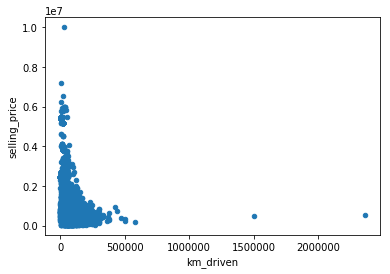

In [1074]:
price_km_new = cars_outliers_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

In [1075]:
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars.drop(cars[cars['km_driven'] == 1500000].index)

# print(df)

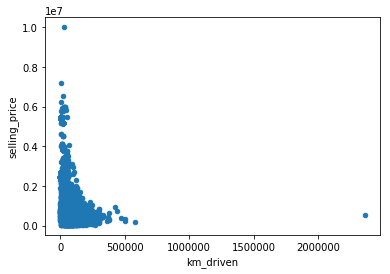

In [1076]:
price_km_new = cars_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

In [1077]:
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars_dropped.drop(cars_dropped[cars_dropped['km_driven'] == 2360457].index)

# print(df)

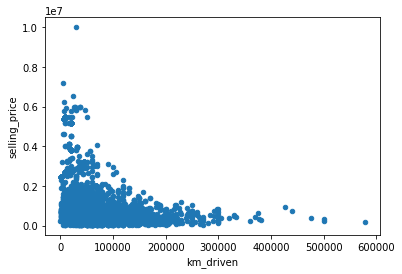

In [1078]:
price_km_new = cars_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

looking at selling price outliers

In [1079]:
cars_dropped.sort_values(by = 'selling_price', ascending = False)[:10]['selling_price']

170     10000000
2938     7200000
4952     6523000
4950     6223000
1071     6000000
4101     6000000
136      6000000
4766     6000000
7713     6000000
5258     6000000
Name: selling_price, dtype: int64

In [1080]:
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars_dropped.drop(cars_dropped[cars_dropped['selling_price'] >= 6223000].index)

# print(df)

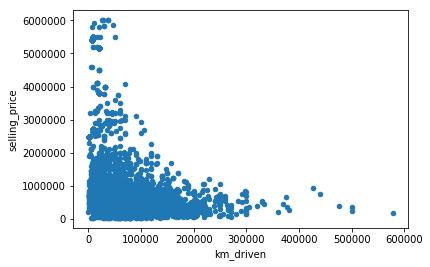

In [1081]:
price_km_new = cars_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

In [1082]:
cars_dropped.sort_values(by = 'km_driven', ascending = False)[:10]['km_driven']

3508    577414
6673    500000
3641    500000
5106    475000
5189    440000
5467    426000
2272    380000
7102    376412
2006    375000
5871    370000
Name: km_driven, dtype: int64

In [1083]:
# drop rows where the 'Name' column matches 'John'
cars_dropped = cars_dropped.drop(cars_dropped[cars_dropped['km_driven'] >= 380000].index)

# print(df)

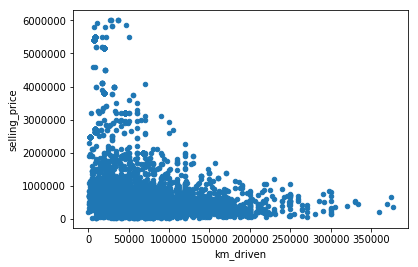

In [1084]:
price_km_new = cars_dropped.plot.scatter(x='km_driven',
                      y='selling_price')

In [1085]:
cars = cars_dropped

# Some More EDA

In [1092]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,bxcx_trans_km_driven,Year Category,fuel_new,owner_new,seats_Category,engine_num,Engine_Category,max_power_num,mp_Category,company_name
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,213.044798,5 Years or Older,oil,First Owner,lt_5,1248,1000_to_1250,74,50_to_100,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,198.276445,5 Years or Older,oil,More than one owner,lt_5,1498,1250_to_1500,103,100_to_150,Skoda
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,210.007021,5 Years or Older,oil,More than one owner,lt_5,1497,1250_to_1500,78,50_to_100,Honda
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,202.513693,5 Years or Older,oil,First Owner,lt_5,1396,1250_to_1500,90,50_to_100,Hyundai
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,198.276445,5 Years or Older,oil,First Owner,lt_5,1298,1250_to_1500,88,50_to_100,Maruti


getting the car company name from the car name column

In [1093]:
# split the 'Name' column into 'First_Name' and 'Last_Name'
cars['company_name'] = cars['name'].str.split(' ', expand=True)[0]


In [1094]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,bxcx_trans_km_driven,Year Category,fuel_new,owner_new,seats_Category,engine_num,Engine_Category,max_power_num,mp_Category,company_name
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,213.044798,5 Years or Older,oil,First Owner,lt_5,1248,1000_to_1250,74,50_to_100,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,198.276445,5 Years or Older,oil,More than one owner,lt_5,1498,1250_to_1500,103,100_to_150,Skoda
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,210.007021,5 Years or Older,oil,More than one owner,lt_5,1497,1250_to_1500,78,50_to_100,Honda
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,202.513693,5 Years or Older,oil,First Owner,lt_5,1396,1250_to_1500,90,50_to_100,Hyundai
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,198.276445,5 Years or Older,oil,First Owner,lt_5,1298,1250_to_1500,88,50_to_100,Maruti


Now lets look at for each company cars what were the mean selling price yearly

In [1095]:
price_bycompany = cars.groupby(['year', 'company_name'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1097]:
# price_bycompany

company_name
Ambassador       1.240000e+05
Ashok            3.000000e+05
Audi             2.414263e+06
BMW              4.127778e+06
Chevrolet        2.738675e+05
Daewoo           7.700000e+04
Datsun           3.146000e+05
Fiat             3.171951e+05
Force            8.875000e+05
Ford             5.208737e+05
Honda            5.969209e+05
Hyundai          4.732632e+05
Isuzu            1.942000e+06
Jaguar           2.915465e+06
Jeep             2.149613e+06
Kia              1.504500e+06
Land             3.608333e+06
Lexus            5.150000e+06
MG               1.783333e+06
Mahindra         6.309880e+05
Maruti           4.089595e+05
Mercedes-Benz    2.470444e+06
Mitsubishi       8.175000e+05
Nissan           4.654074e+05
Opel             6.800000e+04
Renault          4.626184e+05
Skoda            6.097211e+05
Tata             3.618538e+05
Toyota           1.014116e+06
Volkswagen       4.898919e+05
Volvo            3.170076e+06
Name: selling_price, dtype: float64


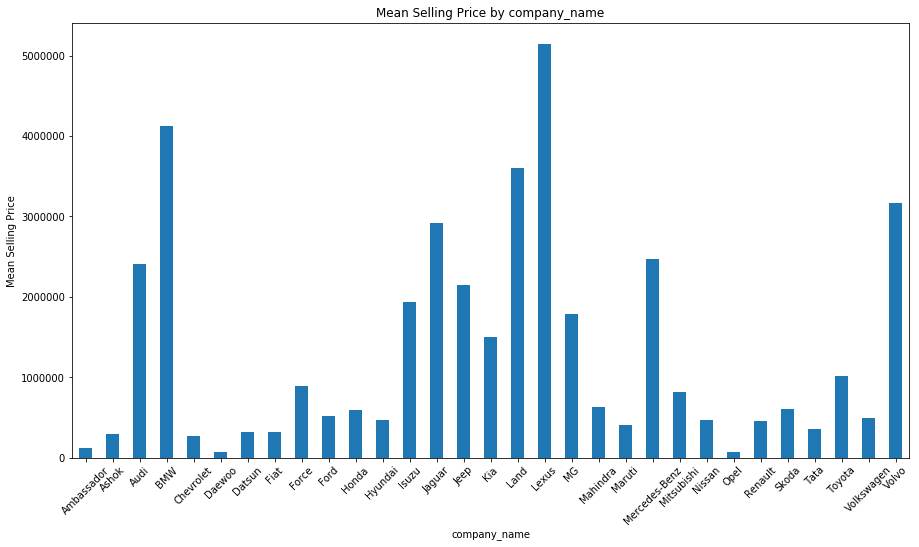

In [1109]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('company_name')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0)
plt.xlabel('company_name')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by company_name')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

In [1113]:
fig = plt.figure(figsize=(15,15))
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "company_name", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [1114]:
cars.company_name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [1115]:
##let's look at some selected companies
cars_filtered = cars.loc[cars['company_name'].isin(['Honda', 'Ambassador', 'Toyota', 'Tata', 'Audi', 'Mercedes-Benz'])]
# cars_filtered = cars.loc[cars['company_name'].isin(['Tata'])]
price_bycompany_flt = cars_filtered.groupby(['year', 'company_name'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1116]:
fig = px.line(price_bycompany_flt
                   ,x='year', y = "selling_price", 
                   color = "company_name", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

## Some examples of variation of prices for companies over the years - 
* Ambassador cars Prices Didnt Rise much and also We donot have many ambassadors after 2008
* Honda cars prices have seen a steady rise since 2005 with recenly in 2020 we are seeing a sharp rise from 2019
* Toyota cars started showing up more from 2002 and currently in 2020 we have toyota cars of the range of 20 million

Since the number of different car company names are too many to learn from, lets create some more categories from the company names,

* company country - this column tells us about the country from which the car company belong to
* company_class_type - This column tells us to which type of class the company cars belong too, for example, economic, premium, luxury etc

In [1117]:
# create a dictionary with car companies and their countries
country_dict = {'Maruti': 'India',
                'Skoda': 'Czech Republic',
                'Honda': 'Japan',
                'Hyundai': 'South Korea',
                'Toyota': 'Japan',
                'Ford': 'United States',
                'Renault': 'France',
                'Mahindra': 'India',
                'Tata': 'India',
                'Chevrolet': 'United States',
                'Datsun': 'Japan',
                'Jeep': 'United States',
                'Mercedes-Benz': 'Germany',
                'Mitsubishi': 'Japan',
                'Audi': 'Germany',
                'Volkswagen': 'Germany',
                'BMW': 'Germany',
                'Nissan': 'Japan',
                'Lexus': 'Japan',
                'Jaguar': 'United Kingdom',
                'Land': 'United Kingdom',
                'MG': 'United Kingdom',
                'Volvo': 'Sweden',
                'Daewoo': 'South Korea',
                'Kia': 'South Korea',
                'Fiat': 'Italy',
                'Force': 'India',
                'Ambassador': 'India',
                'Ashok': 'India',
                'Isuzu': 'Japan',
                'Opel': 'Germany'}


# create a dictionary with car companies and their classes
class_dict = {'Maruti': 'Economy',
              'Skoda': 'Premium',
              'Honda': 'Economy',
              'Hyundai': 'Economy',
              'Toyota': 'Premium',
              'Ford': 'Economy',
              'Renault': 'Economy',
              'Mahindra': 'Economy',
              'Tata': 'Economy',
              'Chevrolet': 'Economy',
              'Datsun': 'Economy',
              'Jeep': 'Premium',
              'Mercedes-Benz': 'Luxury',
              'Mitsubishi': 'Economy',
              'Audi': 'Luxury',
              'Volkswagen': 'Economy',
              'BMW': 'Luxury',
              'Nissan': 'Economy',
              'Lexus': 'Luxury',
              'Jaguar': 'Luxury',
              'Land': 'Luxury',
              'MG': 'Economy',
              'Volvo': 'Luxury',
              'Daewoo': 'Economy',
              'Kia': 'Economy',
              'Fiat': 'Economy',
              'Force': 'Economy',
              'Ambassador': 'Economy',
              'Ashok': 'Economy',
              'Isuzu': 'Economy',
              'Opel': 'Economy'}

In [1118]:
# create new columns for country of origin and class of car companies
cars['country'] = cars['company_name'].map(country_dict)
cars['class'] = cars['company_name'].map(class_dict)

# display the resulting dataframe
print(cars)

                                              name       year  selling_price  \
0                           Maruti Swift Dzire VDI 2014-01-01         450000   
1                     Skoda Rapid 1.5 TDI Ambition 2014-01-01         370000   
2                         Honda City 2017-2020 EXi 2006-01-01         158000   
3                        Hyundai i20 Sportz Diesel 2010-01-01         225000   
4                           Maruti Swift VXI BSIII 2007-01-01         130000   
5                    Hyundai Xcent 1.2 VTVT E Plus 2017-01-01         440000   
6                     Maruti Wagon R LXI DUO BSIII 2007-01-01          96000   
7                               Maruti 800 DX BSII 2001-01-01          45000   
8                                 Toyota Etios VXD 2011-01-01         350000   
9             Ford Figo Diesel Celebration Edition 2013-01-01         200000   
10                 Renault Duster 110PS Diesel RxL 2014-01-01         500000   
11                                   Mar

In [1119]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,fuel_new,owner_new,seats_Category,engine_num,Engine_Category,max_power_num,mp_Category,company_name,country,class
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,oil,First Owner,lt_5,1248,1000_to_1250,74,50_to_100,Maruti,India,Economy
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,oil,More than one owner,lt_5,1498,1250_to_1500,103,100_to_150,Skoda,Czech Republic,Premium
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,oil,More than one owner,lt_5,1497,1250_to_1500,78,50_to_100,Honda,Japan,Economy
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,oil,First Owner,lt_5,1396,1250_to_1500,90,50_to_100,Hyundai,South Korea,Economy
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,oil,First Owner,lt_5,1298,1250_to_1500,88,50_to_100,Maruti,India,Economy


In [1120]:
cars['Only_year'] = cars['year'].dt.year
price_bycompany = cars.groupby(['Only_year', 'country'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1121]:
cars_filtered = cars.loc[cars['country'].isin(['India', 'United States', 'Japan', 'Germany'])]

price_bycompany_filtered = cars_filtered.groupby(['Only_year', 'country'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1122]:
fig = px.line(price_bycompany_filtered,
                   x='Only_year', y = "selling_price", 
                   color = "country", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

class
Economy    4.617102e+05
Luxury     3.422459e+06
Premium    1.002375e+06
Name: selling_price, dtype: float64


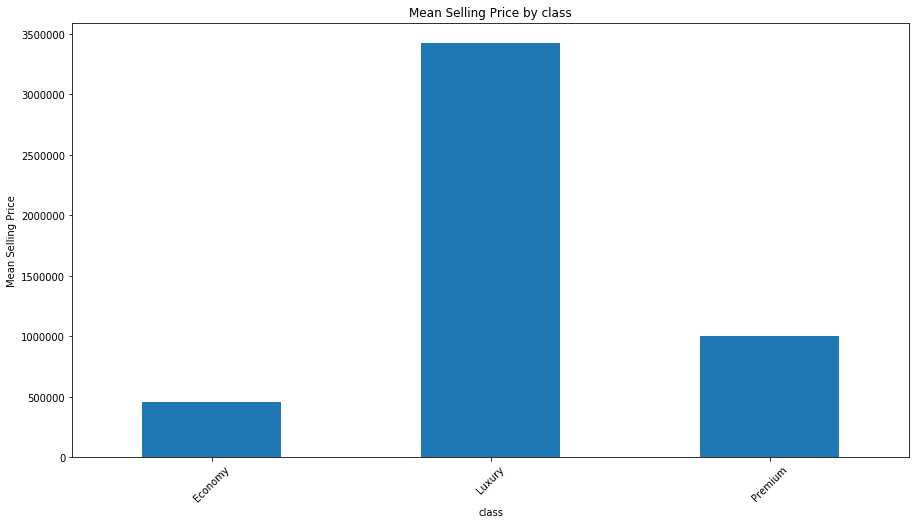

In [1124]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('class')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0)
plt.xlabel('class')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by class')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

country
Czech Republic    6.097211e+05
France            4.626184e+05
Germany           2.022263e+06
India             4.441336e+05
Italy             3.171951e+05
Japan             8.868089e+05
South Korea       4.754142e+05
Sweden            3.170076e+06
United Kingdom    2.924975e+06
United States     5.111348e+05
Name: selling_price, dtype: float64


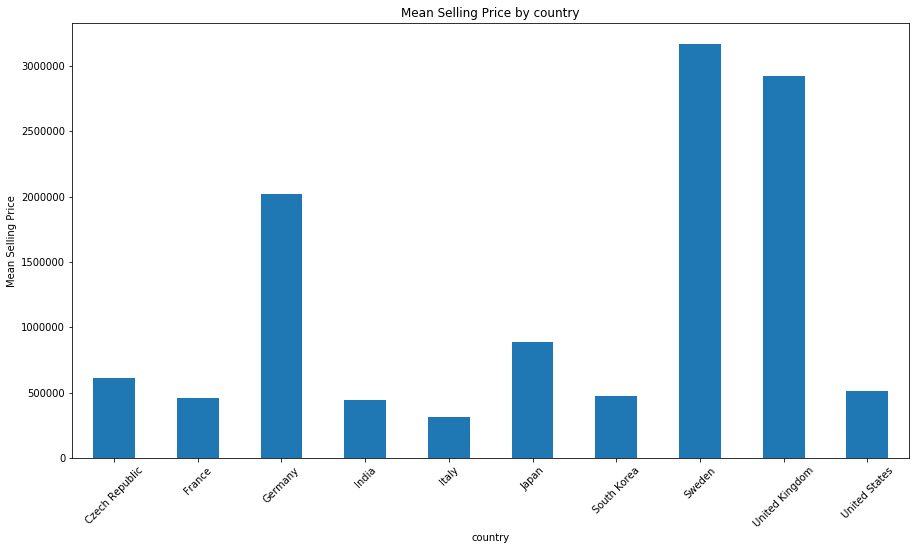

In [1123]:
# group by fuel type and calculate mean selling price
mean_sell_seats = cars.groupby('country')['selling_price'].mean()

# display results
print(mean_sell_seats)


# create a new figure
fig = plt.figure(figsize=(15,8))
# create histogram plot
mean_sell_seats.plot(kind='bar', rot=0)
plt.xlabel('country')
plt.ylabel('Mean Selling Price')
plt.title('Mean Selling Price by country')

# tilt x-axis labels by 45 degrees
plt.xticks(rotation=45)


# display plot
plt.show()

In [1125]:
fig = px.bar(price_bycompany,  
            x='country', y = "selling_price", animation_frame="Only_year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()

In [1126]:
price_bycompany = cars.groupby(['year', 'class'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1127]:
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "class", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

luxury cars are from the range of 2005 and is always costlier followed by premium followed by Economy

In [1128]:
price_bycompany = cars.groupby(['year', 'seller_type'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1134]:
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "seller_type", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

Selling Price of cars by Delaership started showing up from around 2002 and was in similar line as that of Individual sellers but we saw a huge spike from around 2015, with the onset of many new esteemed dealership

In [1135]:
price_bycompany = cars.groupby(['year', 'fuel'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1136]:
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "fuel", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

Diesel car prices have always been a slightly higher than Petrol car prices with recently the price difference from 2012 there is a significant difference

In [1138]:
price_bycompany = cars.groupby(['year', 'owner'])['selling_price'].mean().reset_index(name ='selling_price').round(2)

In [1139]:
fig = px.line(price_bycompany
                   ,x='year', y = "selling_price", 
                   color = "owner", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="car Price Trend per company",
    xaxis_title="Year",
    yaxis_title="Annual Average Price")
fig.show()

Prices dont vary much based on owners when the cars are old but vary significantly on new cars

## Gas consumed by the car

In [996]:
# cars = cars4

In [1149]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 29 columns):
name                    7891 non-null object
year                    7891 non-null datetime64[ns]
selling_price           7891 non-null int64
km_driven               7891 non-null int64
fuel                    7891 non-null object
seller_type             7891 non-null object
transmission            7891 non-null object
owner                   7891 non-null object
mileage                 7891 non-null object
engine                  7891 non-null object
max_power               7891 non-null object
torque                  7891 non-null object
seats                   7891 non-null float64
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
engine_num              789

In [1150]:
# convert mileage to liters per 100 km
cars['fuel_consumption'] = 235.215 / cars['mileage_num']

# calculate total fuel consumed
cars['total_fuel_consumed'] = (cars['fuel_consumption'] / 100) * cars['km_driven']


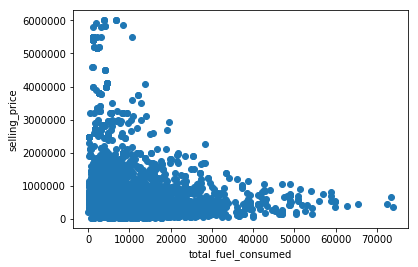

In [1151]:
plt.scatter(cars['total_fuel_consumed'], cars['selling_price'])
plt.xlabel('total_fuel_consumed')
plt.ylabel('selling_price')
plt.show()

lets check on the distribution of the variable as well

with this feature we can drop km_driven and milegae columns

In [1153]:
# calculate the correlation between all variables
corr_matrix = cars.corr()

# print the correlation matrix
display(corr_matrix)

,selling_price,km_driven,seats,log_trans_sel_pc,bxcx_trans_km_driven,engine_num,max_power_num,Only_year,mileage_num,fuel_consumption,total_fuel_consumed
selling_price,1.000000,-0.268776,0.043771,0.800415,-0.326106,0.459692,0.747223,0.415291,-0.133779,0.149697,-0.198836
km_driven,-0.268776,1.000000,0.269623,-0.303082,0.949923,0.243389,-0.046001,-0.504565,-0.200130,0.237549,0.930486
seats,0.043771,0.269623,1.000000,0.189354,0.245469,0.610731,0.195216,-0.007408,-0.456424,0.537473,0.428824
log_trans_sel_pc,0.800415,-0.303082,0.189354,1.000000,-0.357123,0.517937,0.729555,0.703279,-0.036015,0.080952,-0.232876
bxcx_trans_km_driven,-0.326106,0.949923,0.245469,-0.357123,1.000000,0.205735,-0.080716,-0.550148,-0.158390,0.194737,0.855133
engine_num,0.459692,0.243389,0.610731,0.517937,0.205735,1.000000,0.707702,0.018188,-0.578612,0.667278,0.424169
max_power_num,0.747223,-0.046001,0.195216,0.729555,-0.080716,0.707702,1.000000,0.223572,-0.376388,0.423873,0.074280
Only_year,0.415291,-0.504565,-0.007408,0.703279,-0.550148,0.018188,0.223572,1.000000,0.331003,-0.320066,-0.517640
mileage_num,-0.133779,-0.200130,-0.456424,-0.036015,-0.158390,-0.578612,-0.376388,0.331003,1.000000,-0.962416,-0.465130
fuel_consumption,0.149697,0.237549,0.537473,0.080952,0.194737,0.667278,0.423873,-0.320066,-0.962416,1.000000,0.516356


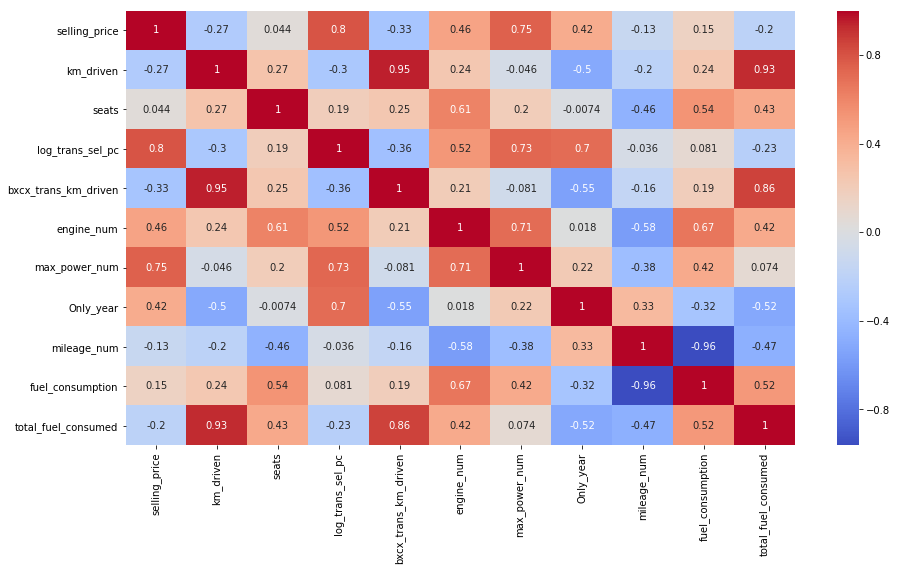

In [1154]:
# set the size of the figure
plt.figure(figsize=(15, 8))

# create a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

## Dropping columns

In [1155]:
cars4 = cars.copy()

In [1156]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,max_power_num,mp_Category,company_name,country,class,Only_year,mileage_num,mileage_Category,fuel_consumption,total_fuel_consumed
0,Maruti Swift Dzire VDI,2014-01-01,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,74,50_to_100,Maruti,India,Economy,2014,23,20_to_25,10.226739,14879.905435
1,Skoda Rapid 1.5 TDI Ambition,2014-01-01,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,103,100_to_150,Skoda,Czech Republic,Premium,2014,21,20_to_25,11.200714,13440.857143
2,Honda City 2017-2020 EXi,2006-01-01,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,78,50_to_100,Honda,Japan,Economy,2006,17,15_to_20,13.836176,19370.647059
3,Hyundai i20 Sportz Diesel,2010-01-01,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,90,50_to_100,Hyundai,South Korea,Economy,2010,23,20_to_25,10.226739,12987.958696
4,Maruti Swift VXI BSIII,2007-01-01,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,88,50_to_100,Maruti,India,Economy,2007,16,15_to_20,14.700938,17641.125000


In [1157]:
cars.columns.values

array(['name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category', 'fuel_new', 'owner_new',
       'seats_Category', 'engine_num', 'Engine_Category', 'max_power_num',
       'mp_Category', 'company_name', 'country', 'class', 'Only_year',
       'mileage_num', 'mileage_Category', 'fuel_consumption',
       'total_fuel_consumed'], dtype=object)

Dropping columns Year, name, mileage, engine, max_power, torque, seats, engine_num, max_power_num, company_name, Only_year, mileage_num

In [1159]:

# drop the columns named 'column_1' and 'column_2'
cars.drop(['year', 'name', 'km_driven', 'fuel', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'engine_num', 'max_power_num', 'mileage_num', 'mileage_Category', 'company_name', 'Only_year', 'mileage_num', 'fuel_consumption'], axis=1, inplace=True)

In [1160]:
cars.columns.values

array(['selling_price', 'seller_type', 'transmission', 'log_trans_sel_pc',
       'bxcx_trans_km_driven', 'Year Category', 'fuel_new', 'owner_new',
       'seats_Category', 'Engine_Category', 'mp_Category', 'country',
       'class', 'total_fuel_consumed'], dtype=object)

In [1161]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 8127
Data columns (total 14 columns):
selling_price           7891 non-null int64
seller_type             7891 non-null object
transmission            7891 non-null object
log_trans_sel_pc        7891 non-null float64
bxcx_trans_km_driven    7891 non-null float64
Year Category           7891 non-null object
fuel_new                7891 non-null object
owner_new               7891 non-null object
seats_Category          7891 non-null category
Engine_Category         7891 non-null category
mp_Category             7891 non-null category
country                 7891 non-null object
class                   7891 non-null object
total_fuel_consumed     7891 non-null float64
dtypes: category(3), float64(3), int64(1), object(7)
memory usage: 763.4+ KB


## pAir plot of features

In [1162]:
# sns.pairplot(cars, plot_kws=dict(alpha=.1, edgecolor='none'))

In [1163]:
# # create scatter plots for each predictor variable against the selling_price variable
# for col in cars.columns:
#     if col != 'selling_price':
#         plt.scatter(cars[col], cars['selling_price'])
#         plt.xlabel(col)
#         plt.ylabel('selling_price')
#         plt.show()

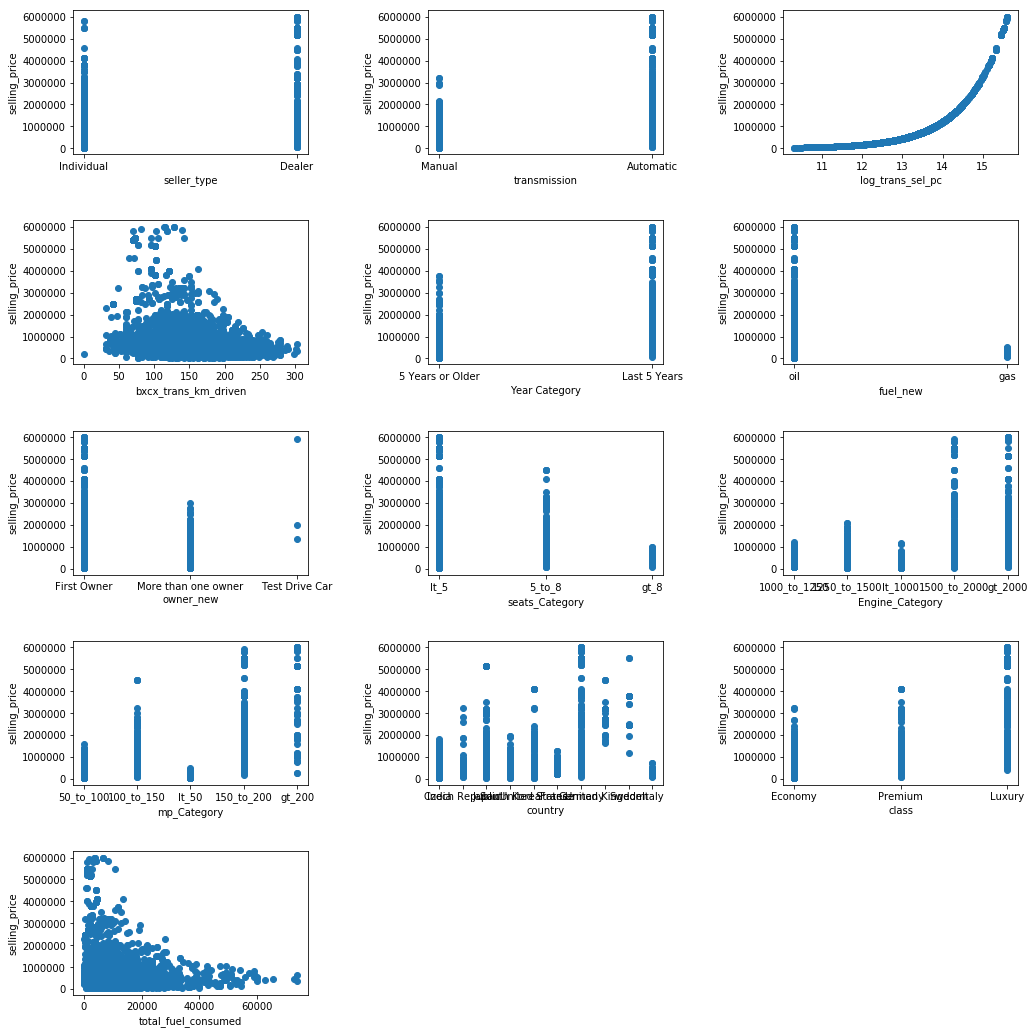

In [1164]:
# select all variables except selling_price
features = list(cars.columns)
features.remove('selling_price')

# calculate the number of rows and columns needed for the plot
n_cols = 3
n_rows = len(features) // n_cols + 1

# create a new figure
fig = plt.figure(figsize=(15, 15))

# loop over all features and create scatter plots with selling_price
for i, feature in enumerate(features):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.scatter(cars[feature], cars['selling_price'])
    ax.set_xlabel(feature)
    ax.set_ylabel('selling_price')

# adjust the layout and padding of the figure
fig.tight_layout(pad=3.0)

# show the plot
plt.show()

In [1165]:
# # create scatter plots for each predictor variable against the selling_price variable
# for col in cars.columns:
#     if col != 'log_trans_sel_pc':
#         plt.scatter(cars[col], cars['log_trans_sel_pc'])
#         plt.xlabel(col)
#         plt.ylabel('log_trans_sel_pc')
#         plt.show()

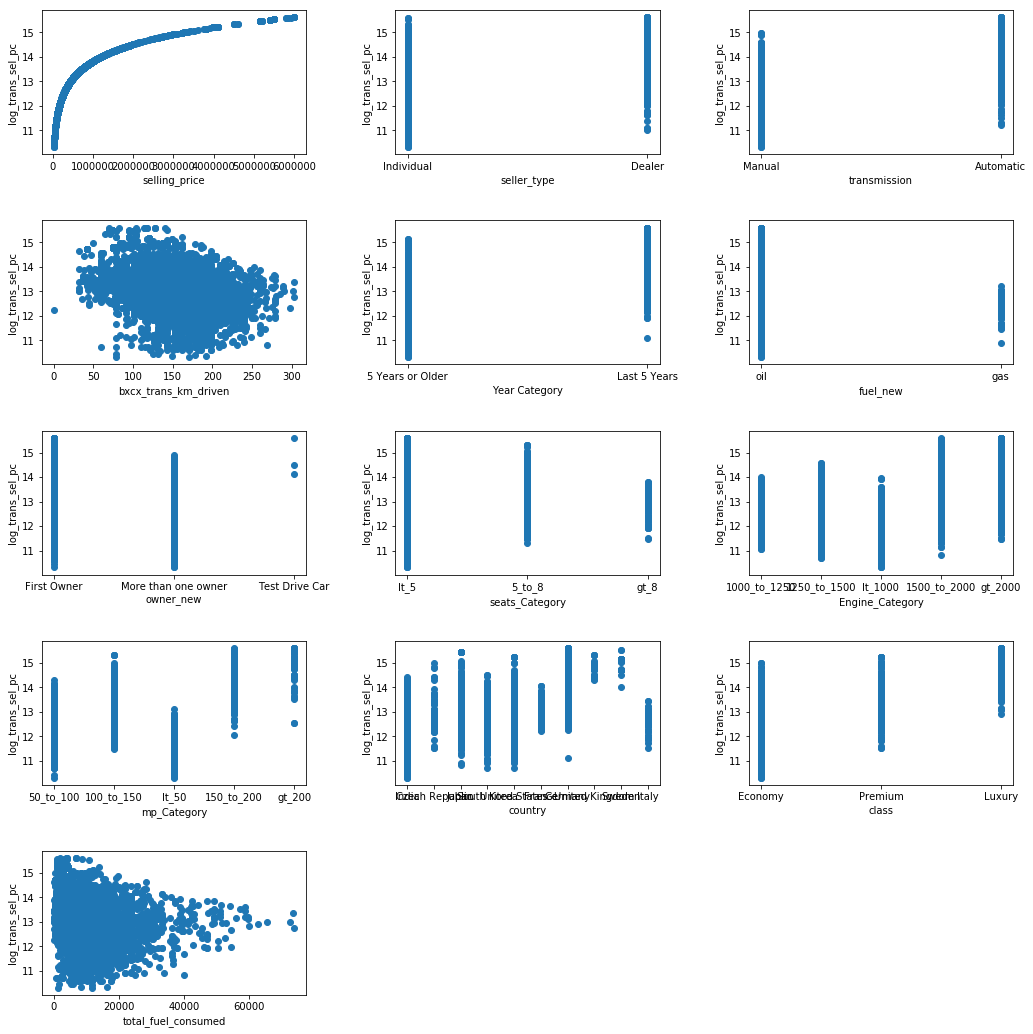

In [1166]:
# select all variables except selling_price
features = list(cars.columns)
features.remove('log_trans_sel_pc')

# calculate the number of rows and columns needed for the plot
n_cols = 3
n_rows = len(features) // n_cols + 1

# create a new figure
fig = plt.figure(figsize=(15, 15))

# loop over all features and create scatter plots with selling_price
for i, feature in enumerate(features):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.scatter(cars[feature], cars['log_trans_sel_pc'])
    ax.set_xlabel(feature)
    ax.set_ylabel('log_trans_sel_pc')

# adjust the layout and padding of the figure
fig.tight_layout(pad=3.0)

# show the plot
plt.show()

# Hypothesis testing

We might want to remove a few more columns, but before that let's create some hypothesis and do some hypothesis testing

1. More the KM driven for the car less is the selling price for the car this is the alternate hypothesis, where as null hypothesis is km driven has nothing to do with selling price
2. Cars sold by dealers have higher Selling Price than the ones sold by Individuals; this is the alternate hypothesis, where as null hypothesis is that dealers don't really have an impact on the car selling price
3. Less than 5 seat cars have higher selling Price than cars with more seats, null hypothesis number of seats in the car doesnot impact that selling price of the car

Threshold for the p value is 0.05 to reject the null hypothesis

Now lets looks at point 2 i.e. delaership has an impact on the selling price

In [905]:
cars.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [906]:
indivdual=cars.loc[cars.seller_type=="Individual"]
dealer=cars.loc[cars.seller_type=="Dealer"]

Now lets look at the log transformed selling price for dealers and Individual

In [907]:
i_sp_lg = indivdual.log_trans_sel_pc
d_sp_lg = dealer.log_trans_sel_pc

i_sp = indivdual.selling_price
d_sp = dealer.selling_price

In [915]:
# i_sp_lg

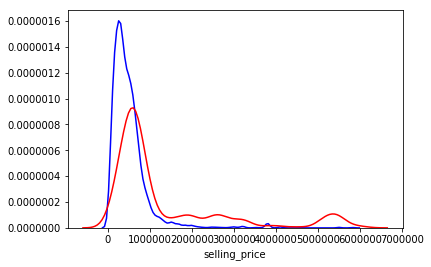

In [911]:
sns.distplot(i_sp,color='blue',hist=False)
sns.distplot(d_sp,color='red',hist=False)

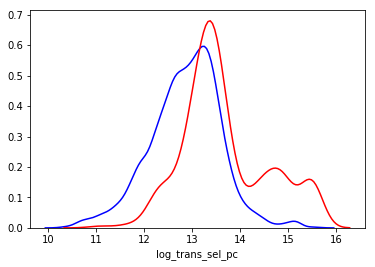

In [912]:
sns.distplot(i_sp_lg,color='blue',hist=False)
sns.distplot(d_sp_lg,color='red',hist=False)

From the grps we can see there is quite a bit of overlap between the distributions

let's look at the mean

In [913]:
individual_sp_lg_mean = indivdual.log_trans_sel_pc.mean()
individual_sp_lg_mean

12.861264675250679

In [914]:
dealer_sp_lg_mean = dealer.log_trans_sel_pc.mean()
dealer_sp_lg_mean

13.665099287594114

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.

In [1174]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(i_sp_lg, d_sp_lg)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -34.87993018454968 , p_value1 =  4.998082021715642e-248


In [917]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between selling Price based on seller types.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between selling Price based on seller types.")

Conclusion: since p_value 4.998082021715642e-248 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between selling Price based on seller types.


Conclusion we reject the null hypothesis and there is a difference in selling price based on the Seller type

Now lets looks at point 3 i.e. number of seats in the car has something to do with the selling price

In [918]:
cars.seats_Category.unique()

[lt_5, 5_to_8, gt_8]
Categories (3, object): [lt_5 < 5_to_8 < gt_8]

In [921]:
lt_5=cars.loc[cars.seats_Category=="lt_5"]
gt_5=cars.loc[(cars['seats_Category'] == '5_to_8') | (cars['seats_Category'] == 'gt_8')]

Now lets look at the log transformed selling price for dealers and Individual

In [922]:
lt_5_sp_lg = lt_5.log_trans_sel_pc
gt_5_sp_lg = gt_5.log_trans_sel_pc

lt_5_sp = lt_5.selling_price
gt_5_sp = gt_5.selling_price

In [915]:
# i_sp_lg

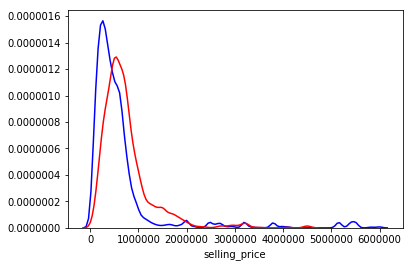

In [923]:
sns.distplot(lt_5_sp,color='blue',hist=False)
sns.distplot(gt_5_sp,color='red',hist=False)

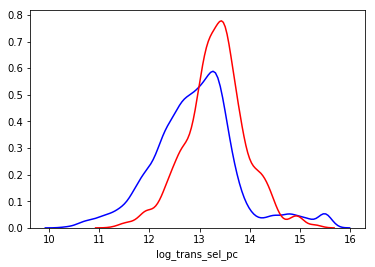

In [925]:
sns.distplot(lt_5_sp_lg,color='blue',hist=False)
sns.distplot(gt_5_sp_lg,color='red',hist=False)

From the grps we can see there is quite a bit of overlap between the distributions

let's look at the mean

In [926]:
lt_5_sp_lg_mean = lt_5.log_trans_sel_pc.mean()
lt_5_sp_lg_mean

12.919688259762204

In [927]:
gt_5_sp_lg_mean = gt_5.log_trans_sel_pc.mean()
gt_5_sp_lg_mean

13.327443306194793

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.

In [928]:
alpha=0.05
t_value2, p_value2 = stats.ttest_ind(lt_5_sp_lg, gt_5_sp_lg)
print("t_value1 = ",t_value2, ", p_value1 = ", p_value2)

t_value1 =  -17.593748094703702 , p_value1 =  5.4068270312859974e-68


In [929]:
if p_value2 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value2,alpha))
    print("Reject the null hypothesis that there is no difference between selling Price based on number of seats in the car.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value2,alpha))
    print("Fail to reject the null hypothesis that there is a difference between selling Price based on number of seats in the car.")

Conclusion: since p_value 5.4068270312859974e-68 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between selling Price based on number of seats in the car.


Conclusion we reject the null hypothesis and there is a difference in selling price based on the number of seats in the car

## One hot encoding for the categorical columns

In [1167]:
# get a list of all categorical columns
cat_cols = list(cars.select_dtypes(include=['object']).columns)

# perform one-hot encoding for all categorical columns
cars = pd.get_dummies(cars, columns=cat_cols)


In [1168]:
cars.head()

,selling_price,log_trans_sel_pc,bxcx_trans_km_driven,seats_Category,Engine_Category,mp_Category,total_fuel_consumed,seller_type_Dealer,seller_type_Individual,transmission_Automatic,...,country_India,country_Italy,country_Japan,country_South Korea,country_Sweden,country_United Kingdom,country_United States,class_Economy,class_Luxury,class_Premium
0,450000,13.017003,213.044798,lt_5,1000_to_1250,50_to_100,14879.905435,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,370000,12.821258,198.276445,lt_5,1250_to_1500,100_to_150,13440.857143,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,158000,11.970350,210.007021,lt_5,1250_to_1500,50_to_100,19370.647059,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,225000,12.323856,202.513693,lt_5,1250_to_1500,50_to_100,12987.958696,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,130000,11.775290,198.276445,lt_5,1250_to_1500,50_to_100,17641.125000,0,1,0,...,1,0,0,0,0,0,0,1,0,0


## Dropping some more columns

In [1169]:
cars.columns.values

array(['selling_price', 'log_trans_sel_pc', 'bxcx_trans_km_driven',
       'seats_Category', 'Engine_Category', 'mp_Category',
       'total_fuel_consumed', 'seller_type_Dealer',
       'seller_type_Individual', 'transmission_Automatic',
       'transmission_Manual', 'Year Category_5 Years or Older',
       'Year Category_Last 5 Years', 'fuel_new_gas', 'fuel_new_oil',
       'owner_new_First Owner', 'owner_new_More than one owner',
       'owner_new_Test Drive Car', 'country_Czech Republic',
       'country_France', 'country_Germany', 'country_India',
       'country_Italy', 'country_Japan', 'country_South Korea',
       'country_Sweden', 'country_United Kingdom',
       'country_United States', 'class_Economy', 'class_Luxury',
       'class_Premium'], dtype=object)

In [935]:

# # drop the columns named 'column_1' and 'column_2'
# cars.drop([ 'km_driven', 'bxcx_trans_km_driven'], axis=1, inplace=True)

In [1170]:
# calculate the correlation between all variables
corr_matrix = cars.corr()

# print the correlation matrix
display(corr_matrix)

,selling_price,log_trans_sel_pc,bxcx_trans_km_driven,total_fuel_consumed,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,Year Category_5 Years or Older,Year Category_Last 5 Years,...,country_India,country_Italy,country_Japan,country_South Korea,country_Sweden,country_United Kingdom,country_United States,class_Economy,class_Luxury,class_Premium
selling_price,1.000000,0.800415,-0.326106,-0.198836,0.390949,-0.390949,0.591517,-0.591517,-0.383087,0.383087,...,-0.247270,-0.029797,0.121938,-0.097980,0.290122,0.288648,-0.050747,-0.618081,0.788073,0.125925
log_trans_sel_pc,0.800415,1.000000,-0.357123,-0.232876,0.365528,-0.365528,0.501211,-0.501211,-0.533590,0.533590,...,-0.259095,-0.037206,0.189707,-0.047320,0.215587,0.229640,-0.067423,-0.508122,0.528834,0.201602
bxcx_trans_km_driven,-0.326106,-0.357123,1.000000,0.855133,-0.263111,0.263111,-0.293807,0.293807,0.558725,-0.558725,...,0.081872,0.028329,0.029779,-0.046496,-0.158207,-0.096024,0.045017,0.067400,-0.222639,0.098901
total_fuel_consumed,-0.198836,-0.232876,0.855133,1.000000,-0.208883,0.208883,-0.161827,0.161827,0.482662,-0.482662,...,0.032888,0.010728,0.129896,-0.089654,-0.086478,-0.066261,0.018666,-0.101079,-0.129092,0.232390
seller_type_Dealer,0.390949,0.365528,-0.263111,-0.208883,1.000000,-1.000000,0.378523,-0.378523,-0.245768,0.245768,...,-0.182052,-0.027991,0.171401,-0.072991,0.077057,0.200181,-0.021141,-0.326136,0.327749,0.139022
seller_type_Individual,-0.390949,-0.365528,0.263111,0.208883,-1.000000,1.000000,-0.378523,0.378523,0.245768,-0.245768,...,0.182052,0.027991,-0.171401,0.072991,-0.077057,-0.200181,0.021141,0.326136,-0.327749,-0.139022
transmission_Automatic,0.591517,0.501211,-0.293807,-0.161827,0.378523,-0.378523,1.000000,-1.000000,-0.269056,0.269056,...,-0.206977,-0.028111,0.092214,-0.081699,0.236109,0.260180,-0.067292,-0.467824,0.579566,0.109258
transmission_Manual,-0.591517,-0.501211,0.293807,0.161827,-0.378523,0.378523,-1.000000,1.000000,0.269056,-0.269056,...,0.206977,0.028111,-0.092214,0.081699,-0.236109,-0.260180,0.067292,0.467824,-0.579566,-0.109258
Year Category_5 Years or Older,-0.383087,-0.533590,0.558725,0.482662,-0.245768,0.245768,-0.269056,0.269056,1.000000,-1.000000,...,0.062823,0.050946,-0.027818,0.004744,-0.102014,-0.098129,0.054542,0.105053,-0.164687,0.003925
Year Category_Last 5 Years,0.383087,0.533590,-0.558725,-0.482662,0.245768,-0.245768,0.269056,-0.269056,-1.000000,1.000000,...,-0.062823,-0.050946,0.027818,-0.004744,0.102014,0.098129,-0.054542,-0.105053,0.164687,-0.003925


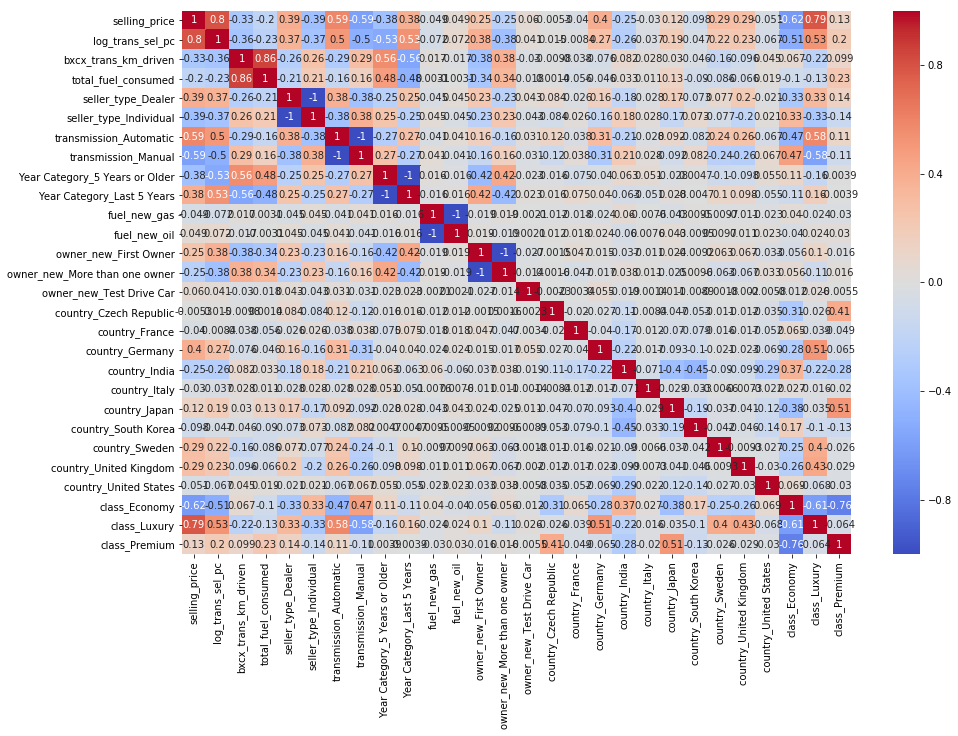

In [1172]:
# set the size of the figure
plt.figure(figsize=(15, 10))

# create a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()